In [13]:
import scipy.io as sio
import os
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
import logging
import random
from collections import Counter



In [2]:
logging.basicConfig(level=logging.ERROR , filename='./logs/data_validation.log', filemode='w', format='%(asctime)s - %(levelname)s - %(message)s')


In [3]:
Preprocessed_dir = './processed'


In [4]:
def load_preprocessed_data (preprocessed_dir):
    # Load preprocessed data
    files = [f for f in os.listdir(preprocessed_dir) if f.endswith('.mat')]
    
    # Inititalize data
    eeg_data = {}
    labels_map = {1:0 , 2:1 , 3:2}
    
    for file in files:
        # Parse subject ID and label
        subject_id , emotion_label, _ = file.split('_')
        subject_id = int(subject_id)
        emotion_label = labels_map[int(emotion_label)]
        
        # prinnt(subject_id , emotion_label)
        # print(subject_id , emotion_label)
        
        # Load data
        data = sio.loadmat(os.path.join(preprocessed_dir , file))
        trial_data = data['data']['trial'][0][0]
        
        #print(trial_data)
        
        if subject_id not in eeg_data:
            eeg_data[subject_id] = {}
        if emotion_label not in eeg_data[subject_id]:
            eeg_data[subject_id][emotion_label] = []
        eeg_data[subject_id][emotion_label].append(trial_data)
        
    print(f"loaded data for {len(eeg_data)} subjects")
    
    # validate data 
    for subject , trial_data in eeg_data.items():
        for label, trial_list in trial_data.items():
            for trial in trial_list:
                if not isinstance(trial,np.ndarray):
                    logging.error(f"Invalid trial type for subject {subject} and label {label} : {type(trial)}")
                    print(f"Invalid trial type for subject {subject} and label {label} : {type(trial)}")
                
    # print(eeg_data.values)
    # for subject, trial_data in eeg_data.items():
    #     for label, trial_list in trial_data.items():
    #         for trial in trial_list:
    #             print(f"Subject: {subject}, Label: {label}, Data: {trial}")
    
    return eeg_data

In [6]:
def visualize_data_distribution (eeg_data):
    emotion_counts = {}
    for subject,data in eeg_data.items():
        for emotion , trials in data.items():
            emotion_counts[emotion] = emotion_counts.get(emotion,0) + len(trials)
            
    plt.bar(emotion_counts.keys() , emotion_counts.values())
    plt.xlabel('Emotion labels')
    plt.ylabel('Number of trials')
    plt.title('Data distribution')
    plt.show()

In [7]:
def enumerate_pairs(eeg_data):
    pairs = []
    for subject, emotions in eeg_data.items():
        for emotion1, emotion2 in combinations(emotions.keys(), 2):
            pairs.append((subject, emotion1, emotion2))
        print(f"Enumerated {len(pairs)} emotion pairs.")
        return pairs

In [10]:
def construct_pairs(eeg_data):
    postive_pairs, negative_pairs = [] , []
    for subject1, data1 in eeg_data.items():
        for subject2, data2 in eeg_data.items():
            if subject1 == subject2:
                continue
            for emotion1, trials1 in data1.items():
                for emotion2, trials2 in data2.items():
                    if emotion1 == emotion2:
                        postive_pairs.append((trials1, trials2))
                    else:
                        negative_pairs.append((trials1,trials2))
    
    print(f"Constructed {len(postive_pairs)} positive pairs nad {len(negative_pairs)} negative pairs")
    return postive_pairs, negative_pairs

loaded data for 15 subjects


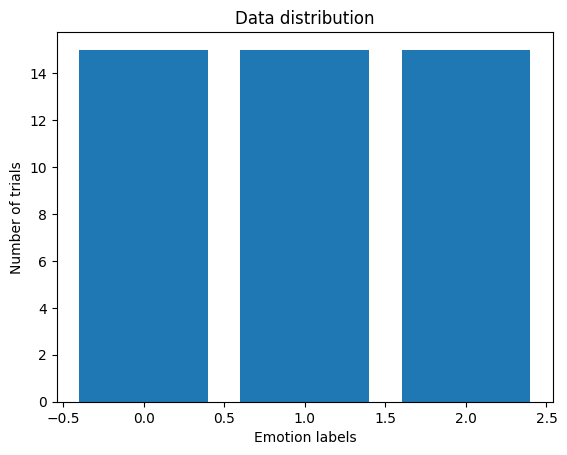

Enumerated 3 emotion pairs.
Constructed 630 positive pairs nad 1260 negative pairs
Example Positive Pair: ([array([[array([[ -1.05347878, -11.80202771, -17.27420378, ...,  11.69510304,
                 17.66776863,   1.8894496 ],
               [ -0.45379212,  -3.7282661 , -15.23844822, ...,  -1.87030251,
                  4.39120589,   2.32283091],
               [ -1.12112612, -12.26388168, -38.63265457, ...,   2.95692731,
                  5.13065668,   1.52806997],
               ...,
               [ -0.39705717,   5.59680882,   8.19283418, ...,   2.27706847,
                 -0.517542  ,  -0.16071538],
               [  3.19644762,  -0.98306134,  -0.95049357, ..., -15.04472122,
                 -8.73871661,   1.29515421],
               [  1.16589737,  74.01867159,  96.99071126, ..., -65.55606633,
                -55.91582518,  -7.55393044]])                               ]],
      dtype=object)], [array([[array([[  0.80086563,  -1.82670103,  -5.49362473, ...,  -5.87605848,
     

In [12]:
if __name__ == '__main__':
    # Load preprocessed data
   eeg_data = load_preprocessed_data(Preprocessed_dir)
   
   #visualize the data distribution
   visualize_data_distribution(eeg_data)
   
   #Enumerate emotion pairs
   emotion_pairs = enumerate_pairs(eeg_data)
   
   # Construct positive and negative pairs
   positive_pairs , negative_pairs = construct_pairs(eeg_data)
   
   # Example: Print some positive and negative pairs
   print("Example Positive Pair:", positive_pairs[0] if positive_pairs else "No positive pairs found")
   print("Example Negative Pair:", negative_pairs[0] if negative_pairs else "No negative pairs found")
   

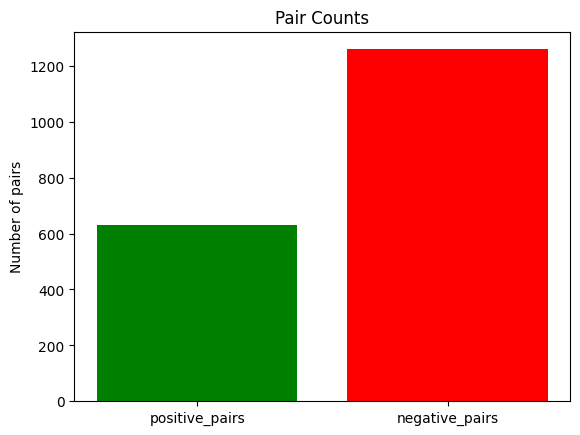

In [14]:
def visualize_pair_counts(positive_pairs , negative_pairs):
    
    #count pairs
    counts = [len(positive_pairs), len(negative_pairs)]
    labels = ['positive_pairs' , 'negative_pairs']
    
    #Create bar chart
    plt.bar(labels, counts, color=['green' , 'red'])
    plt.title('Pair Counts')
    plt.ylabel("Number of pairs")
    plt.show()


visualize_pair_counts(positive_pairs,negative_pairs)
    

In [15]:
def display_random_pairs(positive_pairs, negative_pairs, num_pairs=3):
    print("Sample Positive Pairs:")
    for i in range(min(num_pairs, len(positive_pairs))):
        trial1, trial2 = random.choice(positive_pairs)
        print(f"Trial1 shape: {trial1[0].shape}, Trial2 shape: {trial2[0].shape}")
    
    print("\nSample Negative Pairs:")
    for i in range(min(num_pairs, len(negative_pairs))):
        trial1, trial2 = random.choice(negative_pairs)
        print(f"Trial1 shape: {trial1[0].shape}, Trial2 shape: {trial2[0].shape}")

# Example usage
display_random_pairs(positive_pairs, negative_pairs)

Sample Positive Pairs:
Trial1 shape: (1, 1), Trial2 shape: (1, 1)
Trial1 shape: (1, 1), Trial2 shape: (1, 1)
Trial1 shape: (1, 1), Trial2 shape: (1, 1)

Sample Negative Pairs:
Trial1 shape: (1, 1), Trial2 shape: (1, 1)
Trial1 shape: (1, 1), Trial2 shape: (1, 1)
Trial1 shape: (1, 1), Trial2 shape: (1, 1)


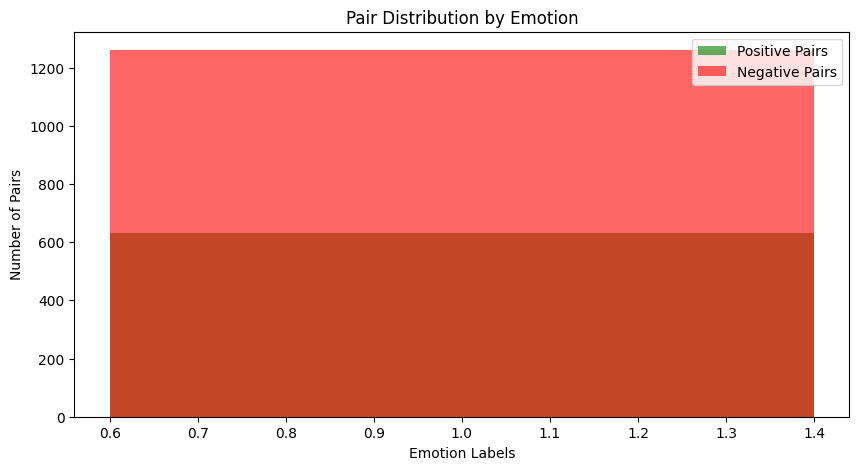

In [17]:
def visualize_pair_distribution(positive_pairs, negative_pairs):
    # Count pairs by emotion
    positive_emotions = [len(pair[0]) for pair in positive_pairs]
    negative_emotions = [len(pair[0]) for pair in negative_pairs]

    positive_counts = Counter(positive_emotions)
    negative_counts = Counter(negative_emotions)

    # Plot distribution
    plt.figure(figsize=(10, 5))
    plt.bar(positive_counts.keys(), positive_counts.values(), color='green', alpha=0.6, label='Positive Pairs')
    plt.bar(negative_counts.keys(), negative_counts.values(), color='red', alpha=0.6, label='Negative Pairs')
    plt.title('Pair Distribution by Emotion')
    plt.xlabel('Emotion Labels')
    plt.ylabel('Number of Pairs')
    plt.legend()
    plt.show()

# Example usage
visualize_pair_distribution(positive_pairs, negative_pairs)

In [22]:
def inspect_pair_structure(pair):
    trial1, trial2 = pair
    print(f"Trial 1 shape: {np.array(trial1).shape}")
    print(f"Trial 2 shape: {np.array(trial2).shape}")

# Example usage
random_positive = random.choice(positive_pairs) if positive_pairs else None
random_negative = random.choice(negative_pairs) if negative_pairs else None

if random_positive:
    inspect_pair_structure(random_positive)
else:
    print("No positive pairs found")

if random_negative:
    inspect_pair_structure(random_negative)
else:
    print("No negative pairs found")


Trial 1 shape: (1, 1, 1)
Trial 2 shape: (1, 1, 1)
Trial 1 shape: (1, 1, 1)
Trial 2 shape: (1, 1, 1)


In [23]:
def inspect_trial_contents(trial):
    print("Raw Trial Data:")
    print(trial)
    print("Type:", type(trial))
    if isinstance(trial, np.ndarray):
        print("Contents:", trial.flatten())
    else:
        print("Non-numpy data structure.")


inspect_trial_contents(random_positive[0])
inspect_trial_contents(random_positive[1])


Raw Trial Data:
[array([[array([[-6.03529028e+00, -1.91980714e+00, -9.45470894e+00, ...,
                 1.63731148e+02,  1.20623079e+02, -7.56311587e+00],
               [-6.95907325e+00,  7.16308747e+00, -5.19988254e-02, ...,
                 1.55213865e+02,  1.13354118e+02, -7.70673385e+00],
               [-6.65699553e+00,  9.80671853e+00,  7.76311860e+00, ...,
                 1.62064590e+02,  1.17153937e+02, -7.76473186e+00],
               ...,
               [-6.07754104e+00, -3.20661250e+00, -1.27385946e+01, ...,
                 1.49999848e+02,  1.10067480e+02, -6.63104956e+00],
               [-7.44286041e+00,  1.48009938e+01,  8.95923114e+00, ...,
                 1.84038579e+02,  1.62681236e+02,  6.02068133e+01],
               [-2.03662126e+02, -4.13470716e+02,  8.35325129e+00, ...,
                 1.76591541e+02,  1.20012787e+02, -7.41100048e+00]])   ]],
      dtype=object)]
Type: <class 'list'>
Non-numpy data structure.
Raw Trial Data:
[array([[array([[ 3.86627782e-01

In [25]:
def inspect_data_structure(data, level=0):
    print(f"{'  ' * level}Level {level} - Type: {type(data)}, Shape: {getattr(data, 'shape', 'N/A')}")
    if isinstance(data, (list, np.ndarray)) and len(data) > 0:
        inspect_data_structure(data[0], level + 1)

# Example usage
if random_positive:
    inspect_data_structure(random_positive[0])
else:
    print("No positive pairs found")


Level 0 - Type: <class 'list'>, Shape: N/A
  Level 1 - Type: <class 'numpy.ndarray'>, Shape: (1, 1)
    Level 2 - Type: <class 'numpy.ndarray'>, Shape: (1,)
      Level 3 - Type: <class 'numpy.ndarray'>, Shape: (66, 766040)
        Level 4 - Type: <class 'numpy.ndarray'>, Shape: (766040,)
          Level 5 - Type: <class 'numpy.float64'>, Shape: ()
